In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytesseract
import skimage

In [3]:
def plot_image(img, grayscale=True):
    plt.axis('off')
    if grayscale:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show

(2999, 3000, 3)


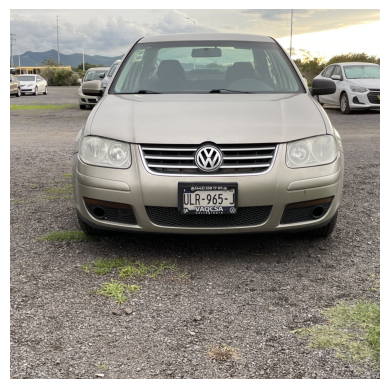

In [127]:
img = cv2.imread(f"good/IMG_4487.jpeg")
print(img.shape)
plot_image(img, False)

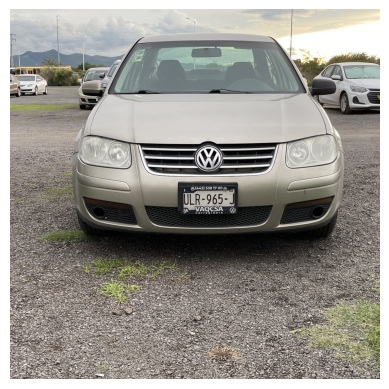

In [128]:
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
sharpened_img= cv2.filter2D(img, -1, kernel)
plot_image(sharpened_img, False)

(2999, 3000)


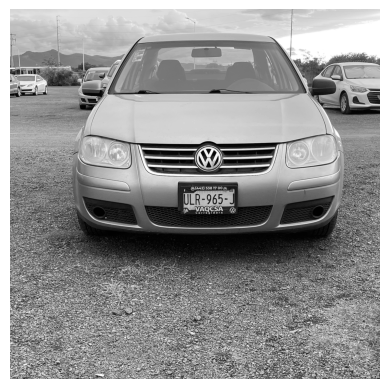

In [129]:
gray = cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2GRAY)
print(gray.shape)
plot_image(gray)

In [130]:
#the standard deviation allows us to customize the threshold value for each image
strd_dev_thresh= (np.std(gray))*1.50
print(strd_dev_thresh)

108.36418952312285


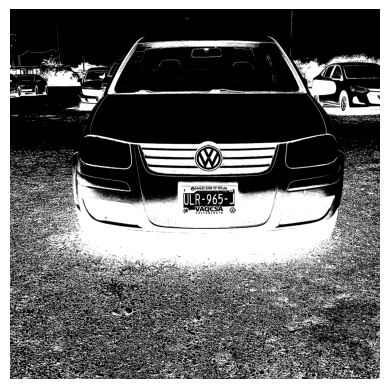

In [131]:
thresh = cv2.threshold(gray, strd_dev_thresh, 255, cv2.THRESH_BINARY_INV)[1]
plot_image(thresh)

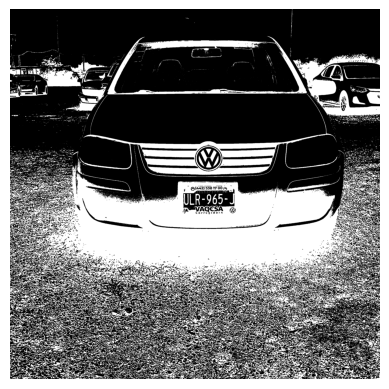

In [132]:
kernel = np.ones((3, 3), np.uint8)
morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
plot_image(morph)

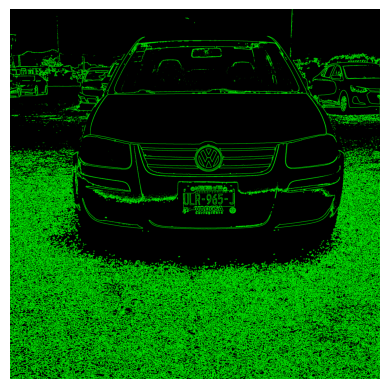

In [133]:
contours = cv2.findContours(morph, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
canvas = np.zeros_like(img)
cv2.drawContours(canvas, contours, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas)

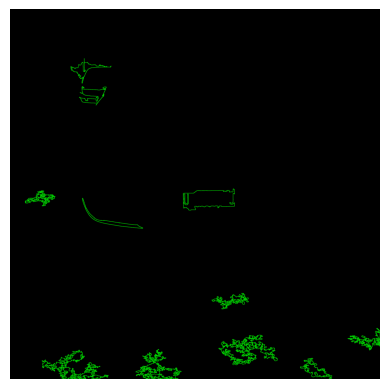

In [134]:
#the heights and widths are being measured in pixels rather than cm or mm
license_ratio =2
min_w=200
max_w =700
min_h=100
max_h=300
candidates=[]
for cnt in contours:
    x, y, w, h, = cv2.boundingRect(cnt)
    aspect_ratio= float(w)/h
    if (np.isclose(aspect_ratio, license_ratio, atol=0.7) and
        (max_w > w >min_w) and
        (max_h > h > min_h)):
        candidates.append(cnt)


canvas = np.zeros_like(img)
cv2.drawContours(canvas, candidates, -1, (0, 255, 0), 2)
plt.axis('off')
plt.imshow(canvas)


2830
2763
2758
2677
2642
2587
2303
1533
1472
1457
626
400
[1533, 1472, 1457]
9


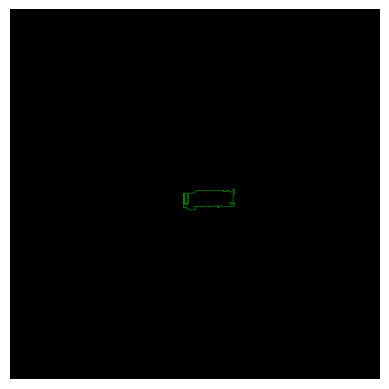

In [135]:
ys=[]
size_candidates=[]


for cnt in candidates:
    x, y, w, h, = cv2.boundingRect(cnt)
    ys.append(y)



counter =0
for x in ys: 
    print(x)
    if 1300<=x<=2000:
        counter = counter+1
        prueba=ys.index(x)
        size_candidates.append(x)
    """if counter <1:
        for i in size_candidates:
            x, y, w, h, = cv2.boundingRect(i)
            perimetro= (2*w)+(2*h)
            print(perimetro)
            if 2000 >= perimetro >=600 :
                prueba=ys.index(x)"""
        
print(size_candidates)
print(prueba)

if prueba is not None:
    license = candidates[prueba]
    canvas = np.zeros_like(img)
    cv2.drawContours(canvas, [license], -1, (0, 255, 0), 2)
    plt.axis('off')
    plt.imshow(canvas)
else:
    print("object not detected in the middle of frame")


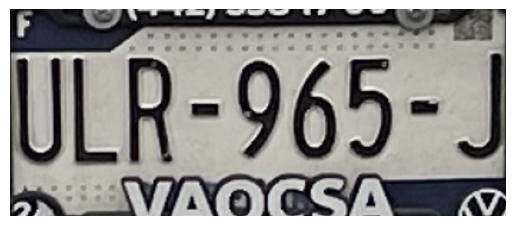

In [136]:
x, y, w, h =cv2.boundingRect(license)
cropped = img[y:y+h, x:x+w]
plot_image(cropped, False)

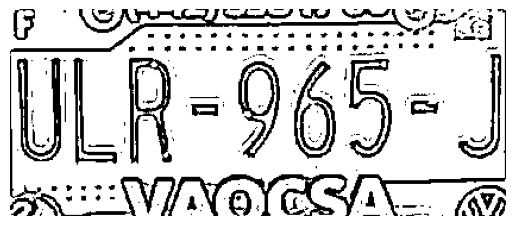

In [137]:
gray_cropped =cv2.cvtColor(cropped, cv2.COLOR_BGR2GRAY)
thresh_cropped = cv2.adaptiveThreshold(gray_cropped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 13)
plot_image(thresh_cropped)

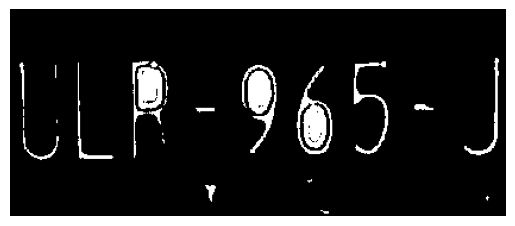

In [50]:
borderless =skimage.segmentation.clear_border(thresh_cropped)
plot_image(borderless)

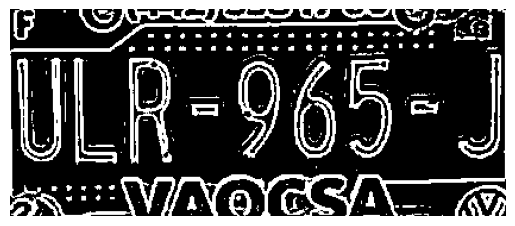

In [138]:
final = cv2.bitwise_not(thresh_cropped)
plot_image(final)

In [140]:
psm = 11
alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
options = "-c tessedit_char_whitelist={}".format(alphanumeric)
options += " --psm {}".format(psm)
txt = pytesseract.image_to_string(final, config=options)
initial_string=txt[:2]+ txt[2:5]+ txt[5:]
#print(initial_string)
if len(initial_string)>1:
    psm = 10
    alphanumeric = "ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"
    options = "-c tessedit_char_whitelist={}".format(alphanumeric)
    options += " --psm {}".format(psm)
    txt = pytesseract.image_to_string(final, config=options)
    second_string=txt[:2]+ txt[2:5]+ txt[5:]
    print(second_string)
    print(f"{second_string[:3]}-{second_string[3:6]}-{second_string[6]}")
else:
    print(initial_string)



ULR965J

ULR-965-J
